In [ ]:
import sys
import os
sys.path.append("..")

%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

%load_ext autoreload
%autoreload 2
from commembed.jupyter import *
import commembed.plots as plots
import commembed.plots.political_polarization as pol
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Echo chamber (left, left) = 0.4892
Echo chamber (right, right) = 0.6823


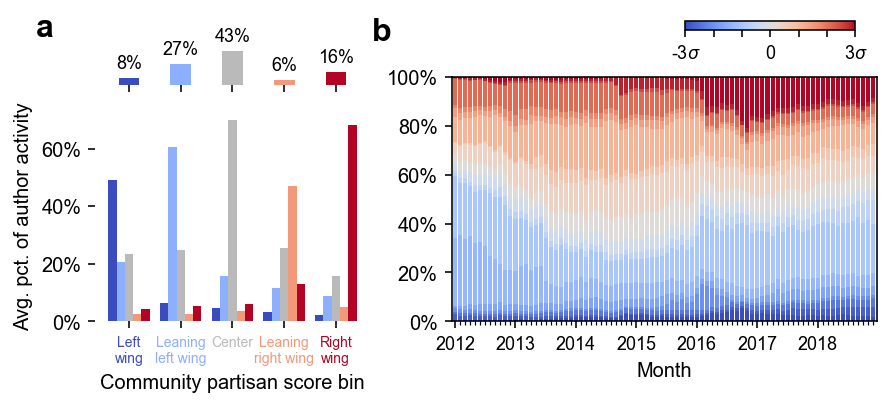

In [122]:
def render_polarization_1(partisan_dimen):

    figsize = (7,2.5)
    fig = plt.figure(figsize=figsize)
    gs0 = gridspec.GridSpec(10, 3, figure=fig, width_ratios=[1.6,1,1])
    gs0.update(wspace=0.4, hspace=0)

    gs_a = gs0[:, 0]
    gs_b = gs0[1:, 1:]
    
    source_data = {}

    ax_echo = pol.render_echo_chamber_plot(fig, gs_a, partisan_dimen, sd=source_data, sd_key="a")
    plots.add_subplot_label(ax_echo, "a", y=18)
    
    ax_activity = pol.render_partisan_activity_plot(fig, gs_b, partisan_dimen, just_first_part=True, sd=source_data, sd_key="b")
    plots.add_subplot_label(ax_activity, "b", y=30, x=-40)

    # TODO Add label to partisan colorbar
    
    return fig, [], source_data

render_polarization_1("partisan")
pass

In [ ]:
def render_polarization_2(partisan_dimen):
    
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    figsize = (8,3.6)
    fig = plt.figure(figsize=figsize)
    gs0 = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1,1,0.7])
    gs0.update(wspace=0.4, hspace=0.5)

    gs_a = gs0[:, 0:2]
    gs_b = gs0[0, 2]
    gs_c = gs0[1, 2]

    source_data = {}
    
    ax_cohort = pol.render_cohort_plot(fig, gs_a, partisan_dimen, "all", legend_bottom_right=True)
    plots.add_subplot_label(ax_cohort, "a", x=-40)
    ax_cohort.set_ylabel("Polarization (avg. absolute z-score)")
    
    ax_r = pol.render_polarization_heatmap(fig, gs_b, partisan_dimen, kind="polprob")
    plots.add_subplot_label(ax_r, "b", x=-50)
    
    ax_pol = pol.render_explained_polarization(fig, gs_c, partisan_dimen, "all")
    plots.add_subplot_label(ax_pol, "c", x=-50)
    
    confound_ax_size = 0.6
    x_offset = 0.09
    
    ax_confound_1 = inset_axes(ax_cohort, width=confound_ax_size, height=confound_ax_size,
                       loc='upper left', borderpad=1,
                       bbox_to_anchor=(x_offset, 0, 1, 1),
                       bbox_transform=ax_cohort.transAxes)
    ax_confound_2 = inset_axes(ax_cohort, width=confound_ax_size, height=confound_ax_size,
                       loc='upper left', borderpad=1,
                       bbox_to_anchor=(x_offset + 0.22, 0, 1, 1),
                       bbox_transform=ax_cohort.transAxes)
    
    pol.render_confound_plot(fig, ax_confound_1, partisan_dimen, "month_since_join_index")
    #plots.add_subplot_label(ax_confound_1, "c", x=-50)
    
    pol.render_confound_plot(fig, ax_confound_2, partisan_dimen, "active_month_index")
    ax_confound_2.set_ylabel("")
    #plots.add_subplot_label(ax_confound_2, "d", x=-60)
    
    ymax = 2.2
    ymin = 1
    for ax in [ax_cohort, ax_confound_1, ax_confound_2]:
        ax.set_ylim(ymin, ymax)

    return fig, [], source_data

render_polarization_2("partisan")

In [ ]:
def render_polarization_2_vertical(partisan_dimen):
    
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    figsize = (7,5.6)
    fig = plt.figure(figsize=figsize)
    gs0 = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[1,1,1.5])
    gs0.update(wspace=0.5, hspace=0.3)

    gs_a = gs0[0:2, :]
    gs_b = gs0[2, 0]
    gs_c = gs0[2, 1]

    source_data = {}
    
    ax_cohort = pol.render_cohort_plot(fig, gs_a, partisan_dimen, "all", legend_bottom_right=True, sd=source_data, sd_key="a")
    plots.add_subplot_label(ax_cohort, "a", x=-50)
    ax_cohort.set_ylabel("Polarization (avg. absolute z-score)")
    #ax_cohort.set_ylabel("")
    
    ax_r = pol.render_polarization_heatmap(fig, gs_b, partisan_dimen, kind="polprob", sd=source_data, sd_key="b")
    plots.add_subplot_label(ax_r, "b", x=-50)
    
    ax_pol = pol.render_explained_polarization(fig, gs_c, partisan_dimen, "all", sd=source_data, sd_key="c")
    plots.add_subplot_label(ax_pol, "c", x=-55)
    
    confound_ax_size = 0.6
    x_offset = 0.09
    
    ax_confound_1 = inset_axes(ax_cohort, width=confound_ax_size, height=confound_ax_size,
                       loc='upper left', borderpad=1,
                       bbox_to_anchor=(x_offset, 0, 1, 1),
                       bbox_transform=ax_cohort.transAxes)
    ax_confound_2 = inset_axes(ax_cohort, width=confound_ax_size, height=confound_ax_size,
                       loc='upper left', borderpad=1,
                       bbox_to_anchor=(x_offset + 0.22, 0, 1, 1),
                       bbox_transform=ax_cohort.transAxes)
    
    # Make inset font size smaller
    ax_confound_1.tick_params(axis='both', labelsize=9)
    ax_confound_2.tick_params(axis='both', labelsize=9)
    ax_confound_1.yaxis.label.set_size(9)
    ax_confound_1.xaxis.label.set_size(9)
    ax_confound_2.xaxis.label.set_size(9)
    
    pol.render_confound_plot(fig, ax_confound_1, partisan_dimen, "month_since_join_index", sd=source_data, sd_key="a_inset1")
    #plots.add_subplot_label(ax_confound_1, "c", x=-50)
    
    pol.render_confound_plot(fig, ax_confound_2, partisan_dimen, "active_month_index", sd=source_data, sd_key="a_inset2")
    ax_confound_2.set_ylabel("")
    #plots.add_subplot_label(ax_confound_2, "d", x=-60)
    
    ymax = 2.3
    ymin = 1
    for ax in [ax_cohort, ax_confound_1, ax_confound_2]:
        ax.set_ylim(ymin, ymax)

    return fig, [], source_data

render_polarization_2_vertical("partisan")
pass

In [ ]:
save_paper_figure(render_polarization_1("partisan"), "fig_pol_1")
save_paper_figure(render_polarization_2_vertical("partisan"), "fig_pol_2")